In [5]:
from os import listdir
import numpy as np
from collections import defaultdict
import json
import pandas as pd
import xml.etree.ElementTree
from bs4 import BeautifulSoup

In [2]:
def readData(jsonpath):
    global allReviews
    for files,filenumber in zip(listdir(jsonpath),range(len(listdir(jsonpath)))):
        d=json.load(open(jsonpath+files,'r'))
        #print(filenumber)
        for hotelInfo in d['HotelInfo']:
            if(hotelInfo == 'Address'):
                addressXml = d['HotelInfo'][hotelInfo]
        soup = BeautifulSoup(addressXml, "xml")
        span = soup.find("span", {'property' : 'v:locality'})
        hotelLocality = ''
        if span and span.text:
            hotelLocality = span.text
        
        for review in d['Reviews']:
            userDict={}
            for key0 in review:
                if key0=='Ratings':
                    for key1 in review[key0]:
                        userDict[key1]=review[key0][key1]
                else:
                    userDict[key0]=review[key0]
            userDict['HotelId'] = filenumber
            userDict['ReviewLength'] = len(userDict['Content'].split())
            userDict['Locality'] = hotelLocality
            #if(userDict['ReviewLength']>2000):
            #    print(userDict['Content'])
            #    break
            allReviews+=[userDict]
        if(filenumber==100):
            break

In [3]:
allReviews = []
print("Reading data...")
readData("TripAdvisorJson\\json\\")
print("Done")
df=pd.DataFrame(allReviews)
df.head()

Reading data...
Done


,Author,AuthorLocation,Business service,"Business service (e.g., internet access)",Check in / front desk,Cleanliness,Content,Date,HotelId,Locality,Location,Overall,ReviewID,ReviewLength,Rooms,Service,Sleep Quality,Title,Value
0,Nadine R,"Jacksonville, Florida",NaN,NaN,NaN,5,"Usually stay near the airport, but this trip w...","April 19, 2012",0,Baltimore,5,5.0,UR128178025,107,5,5,5,“Great place and location”,5
1,blt3116,"Chillicothe, Ohio",NaN,NaN,NaN,4,Stayed at this Hilton for 2 nights. It was lik...,"January 30, 2012",0,Baltimore,5,4.0,UR123847354,50,4,4,4,"“Nice stay, nice surroundings”",4
2,ExSpec5,Northern Virginia,NaN,NaN,NaN,5,"Stayed there one night, December 16, on the wa...","December 28, 2011",0,Baltimore,5,4.0,UR122192448,80,5,5,3,“Perfect for an overnight just off I-95”,3
3,kevinlynch3,Raleigh,NaN,NaN,NaN,5,I just stayed here last weekend and have alrea...,"December 23, 2011",0,Baltimore,5,5.0,UR122031890,214,5,5,5,“Great Hotel”,4
4,nobumponalog,"Belmont, MA",NaN,NaN,NaN,5,My mother who is 90 and I stayed one night on ...,"October 14, 2011",0,Baltimore,5,5.0,UR119295575,80,5,5,5,“good room for handicapped person”,4


In [74]:
df=pd.DataFrame(allReviews)
#dfTrain = pd.read_pickle("dfTrainPickle.pickle")
del allReviews
print("Length before dropping columns/rows: "+str(len(df)))
try:
  df=df.drop(['Check in / front desk', 'Business service (e.g., internet access)','Business service', 'ReviewID', 'Sleep Quality'], axis=1)
except ValueError:
  df=df.drop(['Check in / front desk', 'ReviewID'], axis=1)
df.head(5)
df = df.dropna(axis=0, how='any')
print("Length after dropping columns/rows with NaNs: "+str(len(df)))

Length before dropping columns/rows: 16455
Length after dropping columns/rows with NaNs: 12100


In [5]:
df.head(5)

,Author,AuthorLocation,Cleanliness,Content,Date,HotelId,Location,Overall,ReviewLength,Rooms,Service,Title,Value
0,Nadine R,"Jacksonville, Florida",5,"Usually stay near the airport, but this trip w...","April 19, 2012",0,5,5.0,107,5,5,“Great place and location”,5
1,blt3116,"Chillicothe, Ohio",4,Stayed at this Hilton for 2 nights. It was lik...,"January 30, 2012",0,5,4.0,50,4,4,"“Nice stay, nice surroundings”",4
2,ExSpec5,Northern Virginia,5,"Stayed there one night, December 16, on the wa...","December 28, 2011",0,5,4.0,80,5,5,“Perfect for an overnight just off I-95”,3
3,kevinlynch3,Raleigh,5,I just stayed here last weekend and have alrea...,"December 23, 2011",0,5,5.0,214,5,5,“Great Hotel”,4
4,nobumponalog,"Belmont, MA",5,My mother who is 90 and I stayed one night on ...,"October 14, 2011",0,5,5.0,80,5,5,“good room for handicapped person”,4


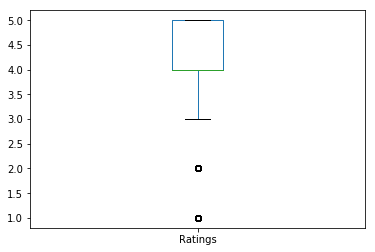

array(['5.0', '4.0', '1.0', '3.0', '2.0'], dtype=object)

In [6]:
import matplotlib.pyplot as plt
scores = pd.DataFrame({"Ratings":df["Overall"].astype(np.float)})
scores.plot.box()
plt.show()
df["Overall"].unique()

In [7]:
import seaborn as sns

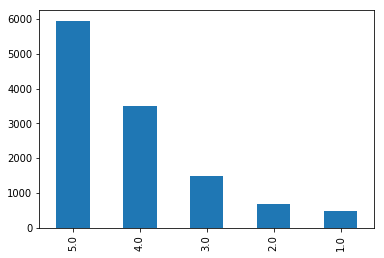

In [8]:
fig, ax = plt.subplots()
df['Overall'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [9]:
df['Overall'].value_counts()
def getFreqCount(colName):
    print(colName)
    li = {}
    for (value,freq) in zip(df[colName].value_counts().index.tolist(),df[colName].value_counts()):
        li[value] = freq
    print(li)
    return li

In [10]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf

In [11]:
df.columns

Index(['Author', 'AuthorLocation', 'Cleanliness', 'Content', 'Date', 'HotelId',
       'Location', 'Overall', 'ReviewLength', 'Rooms', 'Service', 'Title',
       'Value'],
      dtype='object')

Overall
{'5.0': 5945, '4.0': 3493, '3.0': 1491, '2.0': 697, '1.0': 474}
Overall
{'5.0': 5945, '4.0': 3493, '3.0': 1491, '2.0': 697, '1.0': 474}
Cleanliness
{'5': 7479, '4': 2770, '3': 1118, '2': 402, '1': 331}
Service
{'5': 7105, '4': 2615, '3': 1310, '2': 548, '1': 522}
Rooms
{'5': 5685, '4': 3434, '3': 1778, '2': 701, '1': 502}
Location
{'5': 8327, '4': 2578, '3': 858, '2': 232, '1': 105}
Value
{'5': 5400, '4': 3478, '3': 1818, '2': 772, '1': 632}


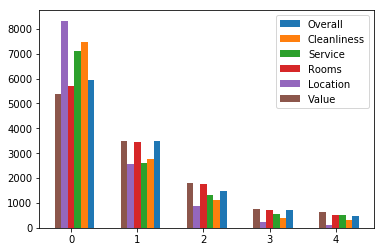

In [12]:
def plotFreqCounts(cols):
    l = len(getFreqCount(cols[0]))
    X = np.arange(l)
    ax = plt#.subplot(111)
    for i in range(len(cols)):
        mult = 1
        if(i%2==0):
            mult = 1
        ax.bar(X+len(cols)*0.1/2-(mult*i*0.1), getFreqCount(cols[i]).values(), width=0.1, align='center')
    ax.legend(cols)
    #ax.autoscale(tight=False)
    ax.figure(figsize=(20,20))
    ax.show()
plotFreqCounts(['Overall', 'Cleanliness', 'Service', 'Rooms', 'Location', 'Value'])

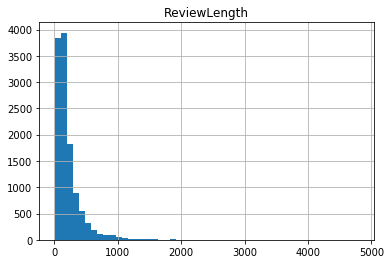

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
df.hist(column='ReviewLength', bins=50)
plt.figure(figsize=(20,3))
plt.show()

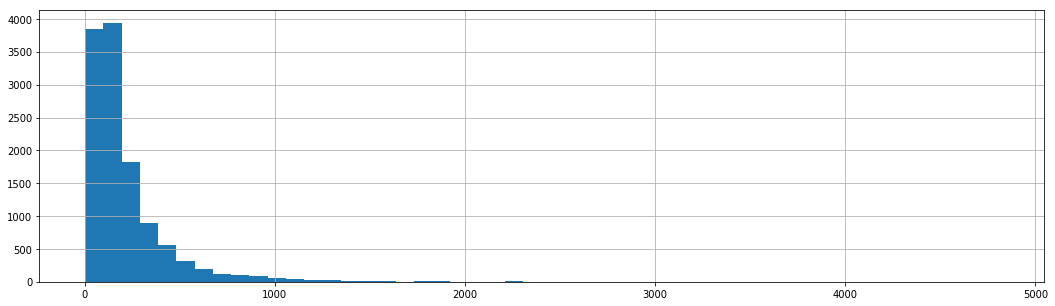

In [14]:
df['ReviewLength'].hist(figsize=(18, 5), bins=50)

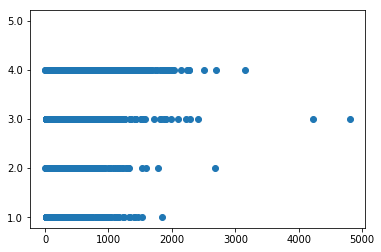

In [15]:
plt.scatter(df['ReviewLength'], df['Overall'])
plt.show()

In [16]:
df['Service'].value_counts()

5    7105
4    2615
3    1310
2     548
1     522
Name: Service, dtype: int64

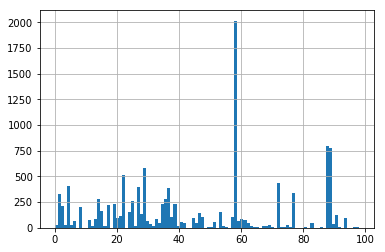

In [20]:
df['HotelId'].hist(bins=100)

In [24]:
    df['Author'].value_counts()[:20]

DougDilvo               5
happymcmartin           5
A TripAdvisor Member    5
2Midwest                5
mtgops                  4
tacomarick              4
gnarfle23               4
boomer1960              3
suziq2Texas             3
inspiration100          3
FlyguyAustin            3
crimson999              3
giggle18                3
wrldtvler               3
LUVtheNW                3
msmegmog                3
akandal                 3
Nancy S                 3
tumblingweed            3
pnutsdad                3
Name: Author, dtype: int64

In [25]:
df['AuthorLocation'].value_counts()[:20]

                             471
Vancouver, Canada            237
Seattle, Washington          143
Vancouver                    131
Portland, Oregon             114
California                   105
Seattle                       94
London, United Kingdom        94
Chicago, Illinois             88
New York City, New York       87
Los Angeles                   84
London                        84
Chicago                       76
New York                      75
Los Angeles, California       73
San Francisco, California     68
Vancouver, BC                 61
Portland, OR                  60
New Jersey                    59
Toronto, Canada               58
Name: AuthorLocation, dtype: int64

In [75]:
df[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']] = df[['Overall', 'Cleanliness', 'Location', 'Rooms', 'Service', 'Value']].apply(pd.to_numeric)
df.groupby('Locality')['Service', 'Cleanliness', 'Location', 'Rooms', 'Value', 'Overall'].agg(np.mean)

,Service,Cleanliness,Location,Rooms,Value,Overall
Locality,,,,,,
,4.510638,4.617021,4.489362,4.212766,4.425532,4.468085
Amsterdam,4.461538,4.923077,5.000000,4.923077,4.538462,4.846154
Baltimore,3.859813,4.392523,4.523364,4.028037,3.813084,3.878505
Barcelona,3.795455,4.318182,4.886364,3.500000,3.386364,3.681818
Berlin,4.075949,4.417722,3.518987,4.050633,4.265823,4.025316
Cidra,3.500000,3.833333,3.333333,3.500000,3.000000,2.666667
Dubai,3.500000,3.285714,3.714286,2.928571,3.642857,3.071429
Indianapolis,4.577778,4.688889,4.555556,4.533333,4.422222,4.444444
Istanbul,4.534591,4.660377,4.716981,4.358491,4.232704,4.465409


In [4]:
plt.scatter(df['Location'], df['Overall'])
plt.show()

NameError: name 'plt' is not defined